In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

So far, I have mutation rate measurements for 9 different concentrations of aTc (different amounts of mutH induced) along with full induction of mutL (via iptg). Taking the numbers from the 15 November notebook; the 8, 13, 14,20, and 21 December Notebooks; and the 24th, 25th, and 26th January Notebooks but only to two significant digits because I'm lazy about typing. I get the following graph.

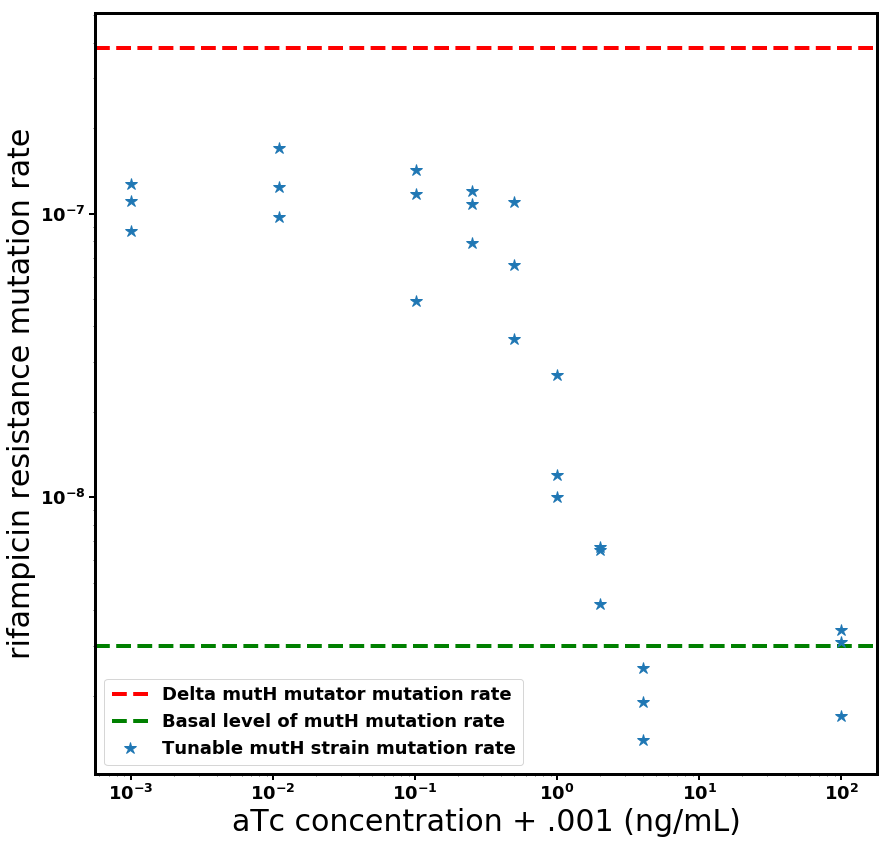

In [2]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.rcParams['axes.linewidth'] = 3

aTc_concentrations = np.array([0, 0, 0, .01, .01, .01, .1, .1, .1, .25, .25, .25, .5, .5, .5,
                               1, 1, 1, 2, 2, 2, 4, 4, 4, 100, 100, 100])+.001
mutation_rates = np.array([111, 127, 87, 170, 97, 124, 49, 117, 142, 79, 108, 120, 36, 110, 66, 12,
                           10, 27, 4.2, 6.7, 6.5, 2.5, 1.4, 1.9, 3.1, 1.7, 3.4]) * 10**-9

plt.figure(figsize=(14,14));
ax = plt.subplot(111)
ax.tick_params(axis='both',length=6, width=2)
ax.axhline(384*10**(-9), linestyle='dashed', color='red', label='Delta mutH mutator mutation rate', linewidth=4);
ax.axhline(3.0*10**(-9), linestyle='dashed', color='green', label='Basal level of mutH mutation rate', linewidth=4);
ax.loglog(aTc_concentrations, mutation_rates, '*', label='Tunable mutH strain mutation rate', markersize=12);
ax.legend(loc='best');

ax.set_ylabel('rifampicin resistance mutation rate', size=30);
ax.set_xlabel('aTc concentration + .001 (ng/mL)', size=30);

In [3]:
from scipy.optimize import curve_fit

In [4]:
def shifted_hill_function(x, K, n, A, c):
    return c + A * 1 / (1 + (K/x)**n)

In [5]:
popt, pcov = curve_fit(shifted_hill_function, aTc_concentrations, mutation_rates)
x = np.linspace(.001, 100, num=10000)
print(popt)

[  5.68489229e-01   3.01901147e+00  -1.11549442e-07   1.13560777e-07]


/home/kuhlmanlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


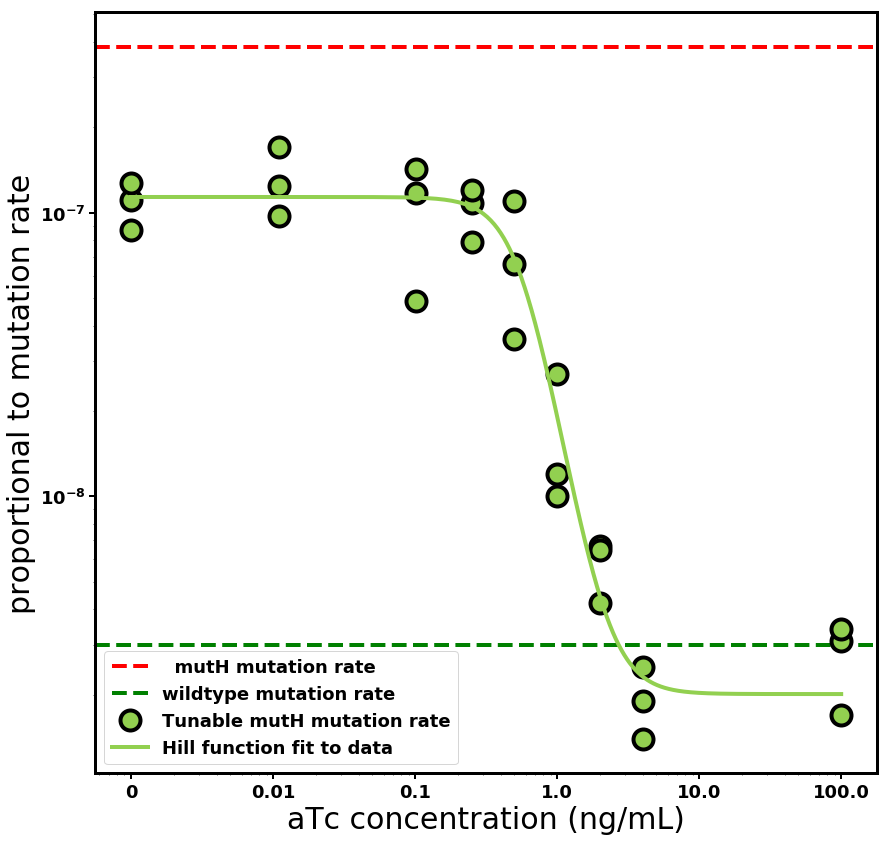

In [7]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=False)
matplotlib.rcParams['axes.linewidth'] = 3

aTc_concentrations = np.array([0, 0, 0, .01, .01, .01, .1, .1, .1, .25, .25, .25, .5, .5, .5,
                               1, 1, 1, 2, 2, 2, 4, 4, 4, 100, 100, 100])+.001
mutation_rates = np.array([111, 127, 87, 170, 97, 124, 49, 117, 142, 79, 108, 120, 36, 110, 66, 12,
                           10, 27, 4.2, 6.7, 6.5, 2.5, 1.4, 1.9, 3.1, 1.7, 3.4]) * 10**-9

plt.figure(figsize=(14,14));
ax = plt.subplot(111)
ax.tick_params(axis='both',length=6, width=2)
ax.axhline(384*10**(-9), linestyle='dashed', color='red', label='  mutH mutation rate', linewidth=4);
ax.axhline(3.0*10**(-9), linestyle='dashed', color='green', label='wildtype mutation rate', linewidth=4);
ax.loglog(aTc_concentrations, mutation_rates, 'o', label='Tunable mutH mutation rate',
          markersize=20, markeredgecolor=(0,0,0), markerfacecolor=(146/255,208/255,80/255),
          markeredgewidth=4);
ax.loglog(x, shifted_hill_function(x, *popt), color=(146/255,208/255,80/255), linewidth=4,
          label='Hill function fit to data')
a=ax.get_xticks().tolist()
a[2]='0'
ax.set_xticklabels(a)
ax.legend(loc='best');

ax.set_ylabel('proportional to mutation rate', size=30);
ax.set_xlabel('aTc concentration (ng/mL)', size=30);

In [11]:
print(popt)
print(np.sqrt(np.diag(pcov)))
print('half-saturation, power, amplitude, shift')

[  5.68489229e-01   3.01901147e+00  -1.11549442e-07   1.13560777e-07]
[  9.99095765e-02   1.43891336e+00   1.23993184e-08   7.89696580e-09]
half-saturation, power, amplitude, shift
